In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [4]:
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","Dist","class"]
data = pd.read_csv("magic04.data",names=cols)

In [5]:
data.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha      Dist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [6]:
data["class"]=(data["class"]=="g").astype(int)

In [7]:
data.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha      Dist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

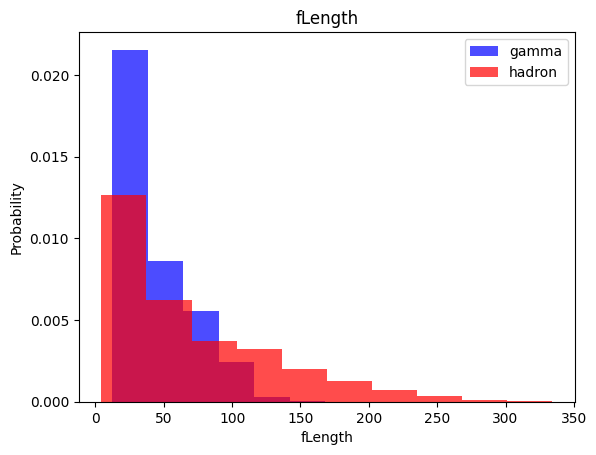

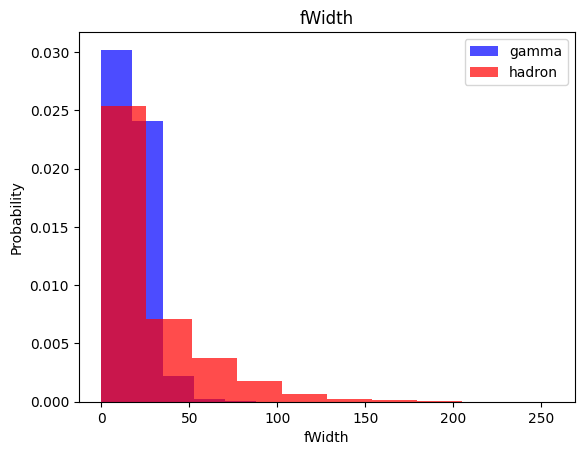

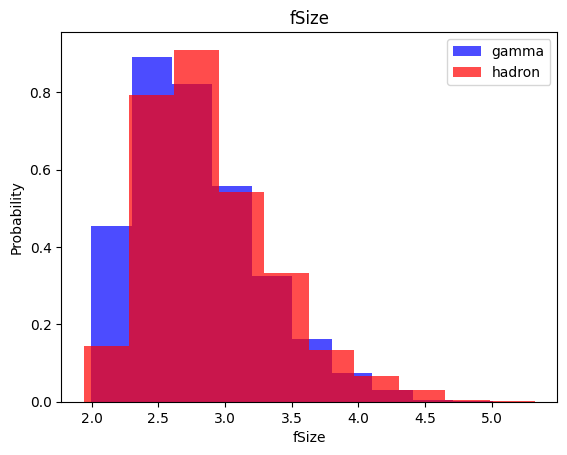

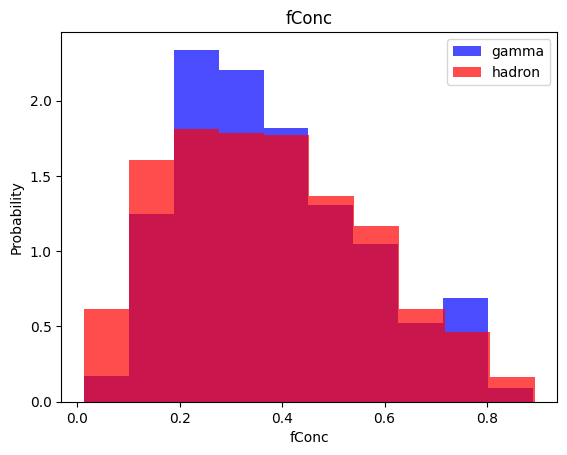

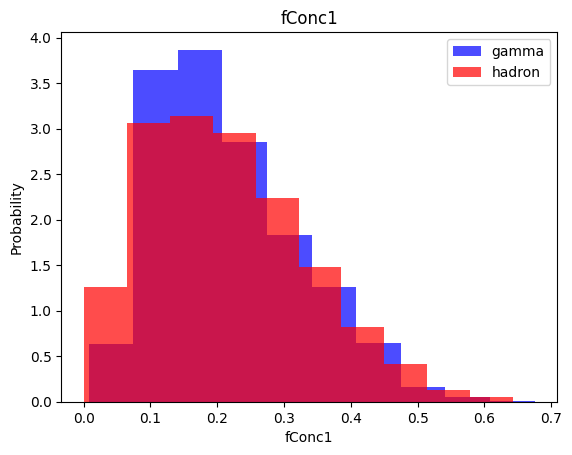

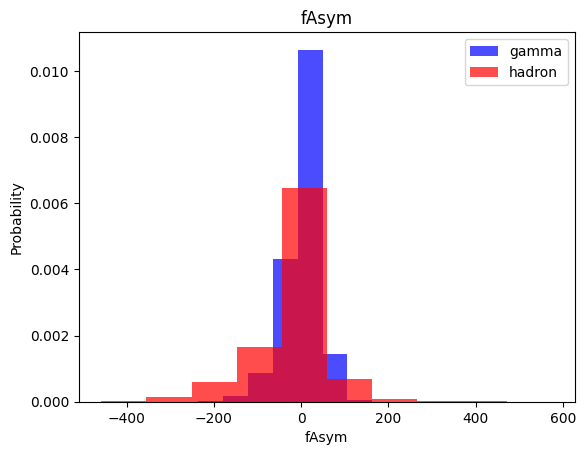

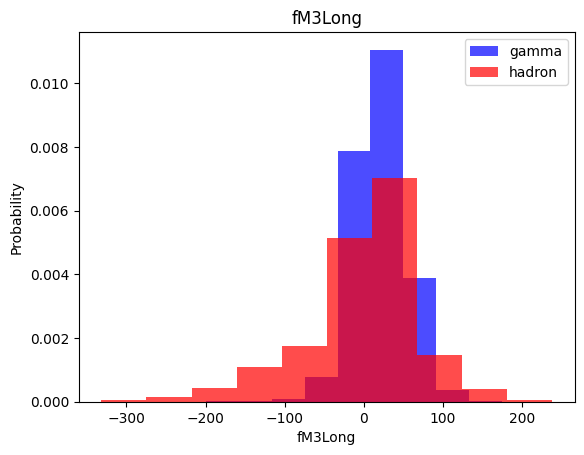

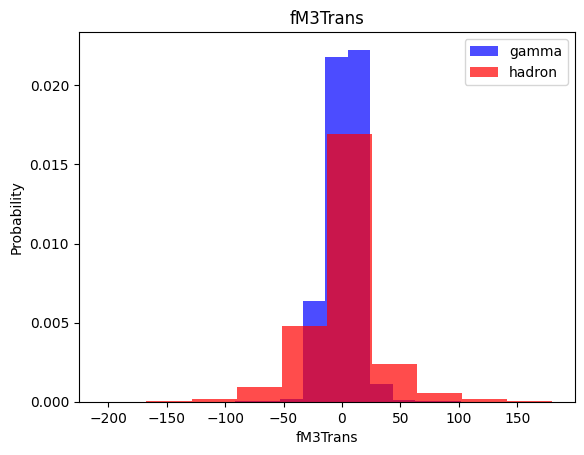

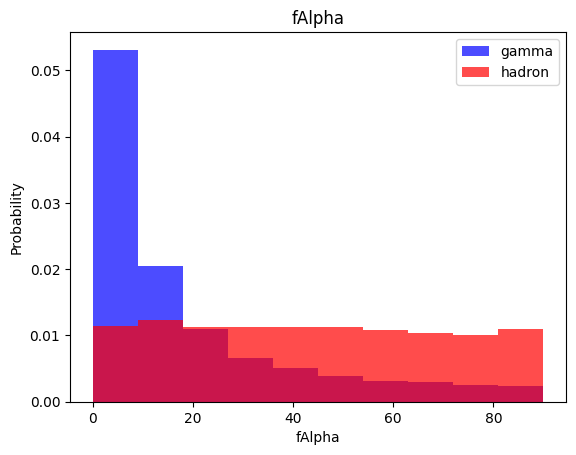

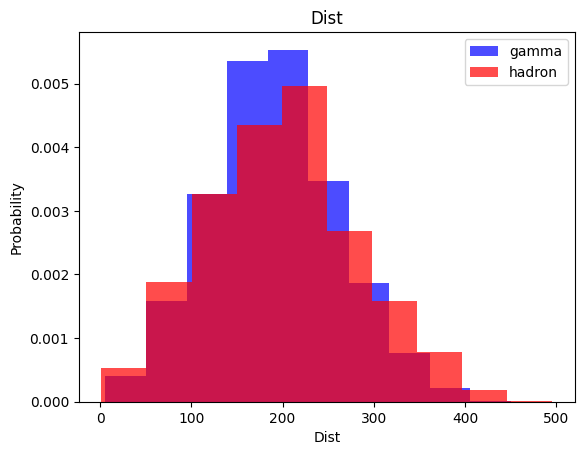

In [8]:
for label in cols[:-1]:
    plt.hist(data[data["class"]==1][label],color='blue',label='gamma',alpha=0.7,density=True)
    plt.hist(data[data["class"]==0][label],color='red',label='hadron',alpha=0.7,density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Train , validation and test datasets

In [23]:
train,valid,test = np.split(data.sample(frac=1),[(int(0.6*len(data))),int(0.8*(len(data)))])

/home/pritish/.local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [10]:
def scale_dataset(dataframe,oversample = False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    
    if oversample:
        ros = RandomOverSampler()
        x,y = ros.fit_resample(x,y)
    df = np.hstack((x,np.reshape(y,(-1,1))))
    return df,x,y

In [24]:
train,x_train,y_train = scale_dataset(data,oversample=True)
valid,x_valid,y_valid = scale_dataset(data,oversample=False)
test,x_test,y_test = scale_dataset(data,oversample=False)

# K nearest neighbors

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [18]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [25]:
y_pred =knn_model.predict(x_test)

In [26]:
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6688
           1       1.00      1.00      1.00     12332

    accuracy                           1.00     19020
   macro avg       1.00      1.00      1.00     19020
weighted avg       1.00      1.00      1.00     19020



# Naive bayes classification

In [28]:
from sklearn.naive_bayes import GaussianNB

In [29]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train,y_train)

In [30]:
y_pred= nb_model.predict(x_test)

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.40      0.51      6688
           1       0.73      0.90      0.81     12332

    accuracy                           0.72     19020
   macro avg       0.71      0.65      0.66     19020
weighted avg       0.72      0.72      0.70     19020



# Logistic regeression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train,y_train)

In [34]:
y_pred= lg_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      6688
           1       0.84      0.82      0.83     12332

    accuracy                           0.79     19020
   macro avg       0.77      0.77      0.77     19020
weighted avg       0.79      0.79      0.79     19020



# Support Vector Machines (SVM)

In [35]:
from sklearn.svm import SVC

In [37]:
svm_model = SVC()
svm_model = svm_model.fit(x_train,y_train)

In [38]:
y_pred= svm_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      6688
           1       0.89      0.91      0.90     12332

    accuracy                           0.87     19020
   macro avg       0.86      0.85      0.86     19020
weighted avg       0.87      0.87      0.87     19020



# Neural Network

In [39]:
import tensorflow as tf

2023-10-10 17:30:39.905901: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-10 17:30:39.964294: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-10 17:30:39.964370: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-10 17:30:39.964437: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-10 17:30:39.978088: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-10 17:30:39.978790: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [53]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [54]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history
  

In [51]:
history = nn_model.fit(
    x_train,y_train,epochs=100,batch_size=32,validation_split=0.2
)

Epoch 1/100
617/617 [==============================] - 3s 3ms/step - loss: 0.4223 - accuracy: 0.8091 - val_loss: 0.5502 - val_accuracy: 0.6933
Epoch 2/100
617/617 [==============================] - 1s 2ms/step - loss: 0.3533 - accuracy: 0.8512 - val_loss: 0.4882 - val_accuracy: 0.7452
Epoch 3/100
617/617 [==============================] - 1s 2ms/step - loss: 0.3378 - accuracy: 0.8585 - val_loss: 0.4617 - val_accuracy: 0.7677
Epoch 4/100
617/617 [==============================] - 1s 2ms/step - loss: 0.3289 - accuracy: 0.8620 - val_loss: 0.4435 - val_accuracy: 0.7675
Epoch 5/100
617/617 [==============================] - 1s 2ms/step - loss: 0.3236 - accuracy: 0.8641 - val_loss: 0.4606 - val_accuracy: 0.7588
Epoch 6/100
617/617 [==============================] - 1s 2ms/step - loss: 0.3185 - accuracy: 0.8668 - val_loss: 0.4740 - val_accuracy: 0.7460
Epoch 7/100
617/617 [==============================] - 1s 2ms/step - loss: 0.3148 - accuracy: 0.8658 - val_loss: 0.4788 - val_accuracy: 0.7482

Epoch 58/100
617/617 [==============================] - 1s 2ms/step - loss: 0.2760 - accuracy: 0.8849 - val_loss: 0.3450 - val_accuracy: 0.8182
Epoch 59/100
617/617 [==============================] - 1s 2ms/step - loss: 0.2770 - accuracy: 0.8839 - val_loss: 0.4136 - val_accuracy: 0.7799
Epoch 60/100
617/617 [==============================] - 1s 2ms/step - loss: 0.2763 - accuracy: 0.8841 - val_loss: 0.4302 - val_accuracy: 0.7849
Epoch 61/100
617/617 [==============================] - 1s 2ms/step - loss: 0.2754 - accuracy: 0.8857 - val_loss: 0.4465 - val_accuracy: 0.7732
Epoch 62/100
617/617 [==============================] - 1s 2ms/step - loss: 0.2762 - accuracy: 0.8841 - val_loss: 0.4032 - val_accuracy: 0.8007
Epoch 63/100
617/617 [==============================] - 1s 2ms/step - loss: 0.2747 - accuracy: 0.8860 - val_loss: 0.3895 - val_accuracy: 0.7967
Epoch 64/100
617/617 [==============================] - 1s 2ms/step - loss: 0.2750 - accuracy: 0.8857 - val_loss: 0.4644 - val_accuracy:

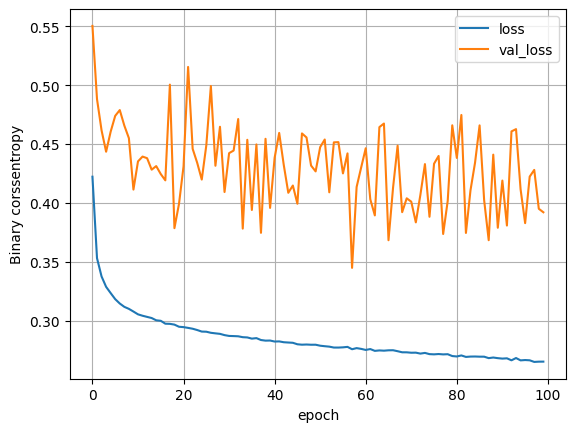

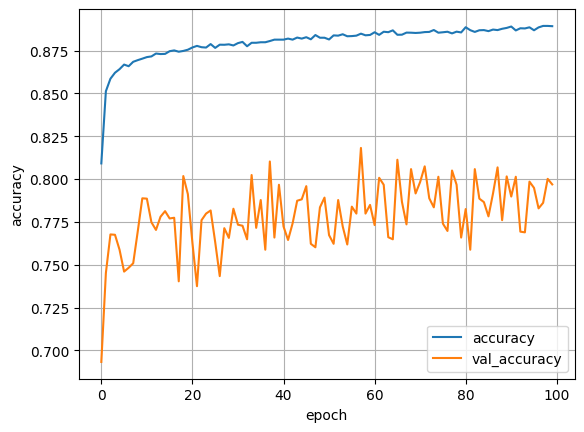

In [52]:
plot_loss(history)
plot_accuracy(history)

# Testing accracy to loss for different layer values

16 nodes, dropout 0, lr 0.01, batch size 32


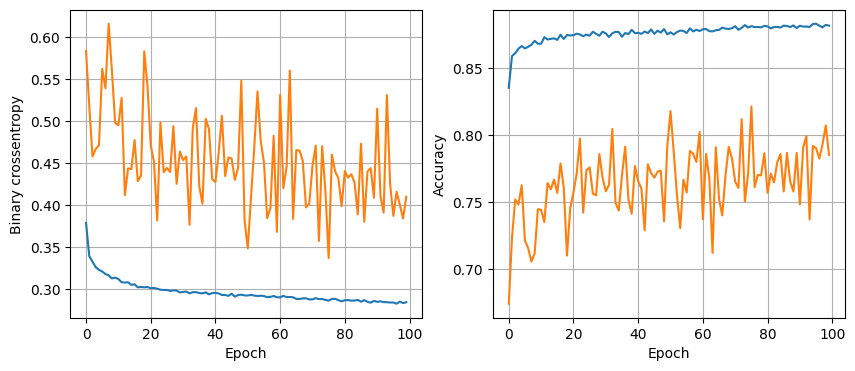

595/595 [==============================] - 1s 2ms/step - loss: 0.2760 - accuracy: 0.8866
16 nodes, dropout 0, lr 0.01, batch size 64


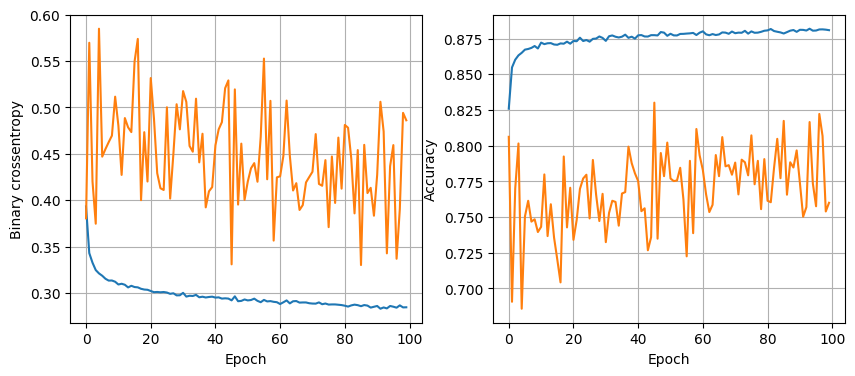

595/595 [==============================] - 1s 1ms/step - loss: 0.2865 - accuracy: 0.8799
16 nodes, dropout 0, lr 0.01, batch size 128


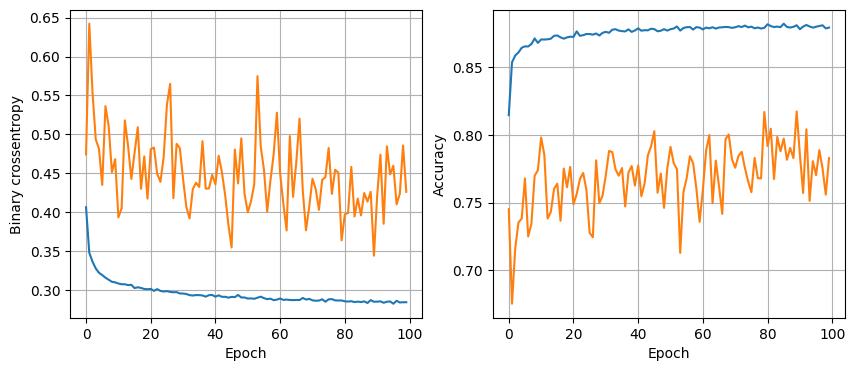

595/595 [==============================] - 1s 1ms/step - loss: 0.2751 - accuracy: 0.8855
16 nodes, dropout 0, lr 0.005, batch size 32


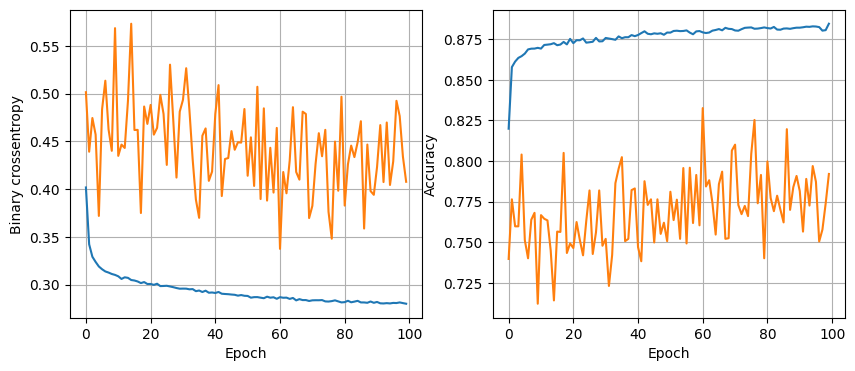

595/595 [==============================] - 1s 1ms/step - loss: 0.2709 - accuracy: 0.8876
16 nodes, dropout 0, lr 0.005, batch size 64


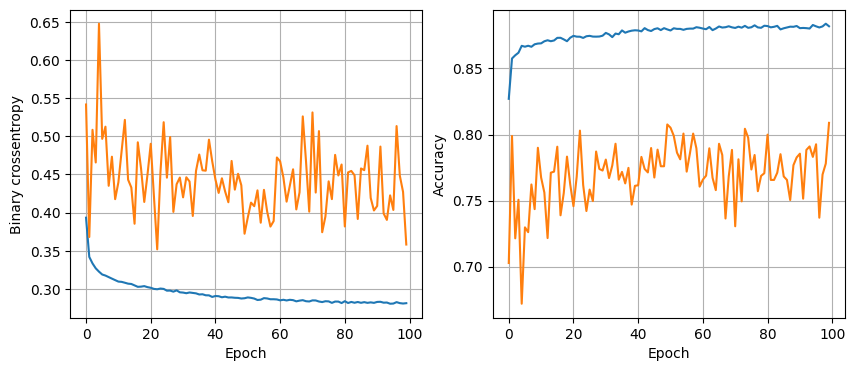

595/595 [==============================] - 1s 1ms/step - loss: 0.2806 - accuracy: 0.8846
16 nodes, dropout 0, lr 0.005, batch size 128


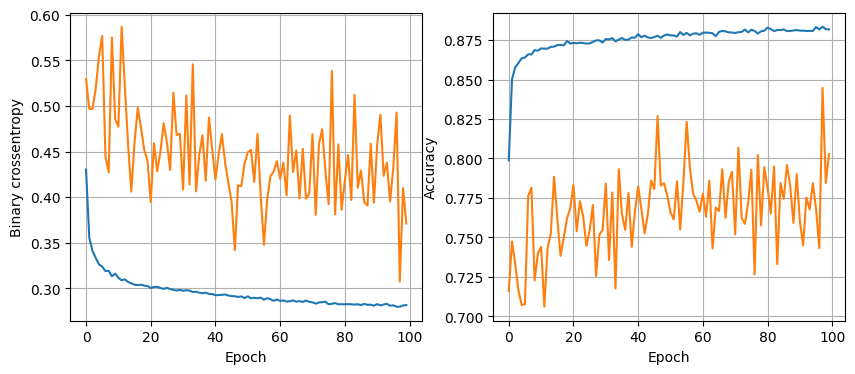

595/595 [==============================] - 1s 1ms/step - loss: 0.2790 - accuracy: 0.8832
16 nodes, dropout 0, lr 0.001, batch size 32


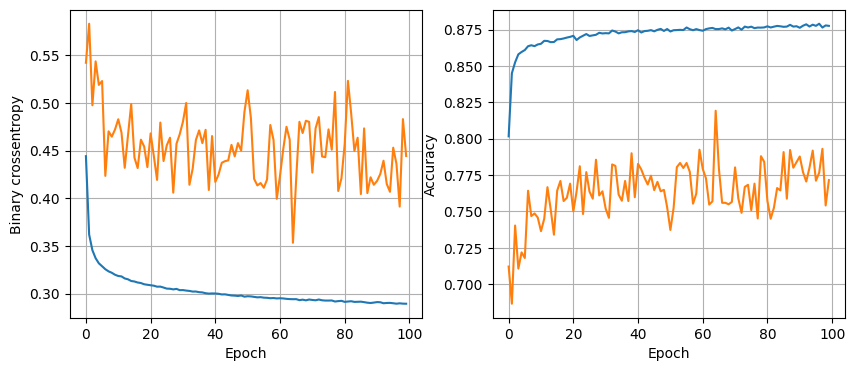

595/595 [==============================] - 1s 1ms/step - loss: 0.2846 - accuracy: 0.8825
16 nodes, dropout 0, lr 0.001, batch size 64


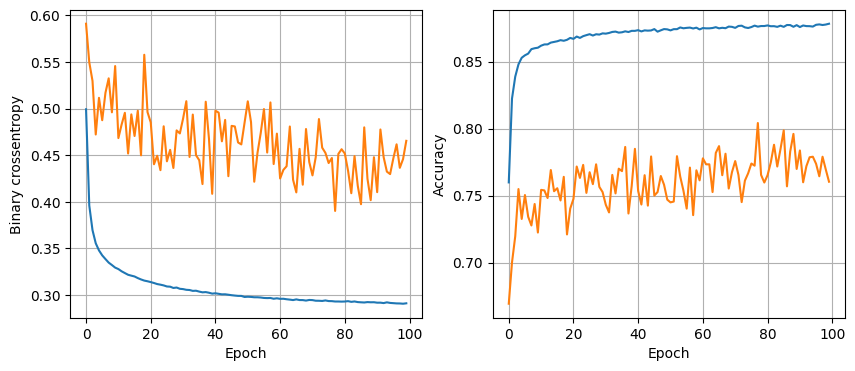

595/595 [==============================] - 1s 1ms/step - loss: 0.2855 - accuracy: 0.8802
16 nodes, dropout 0, lr 0.001, batch size 128


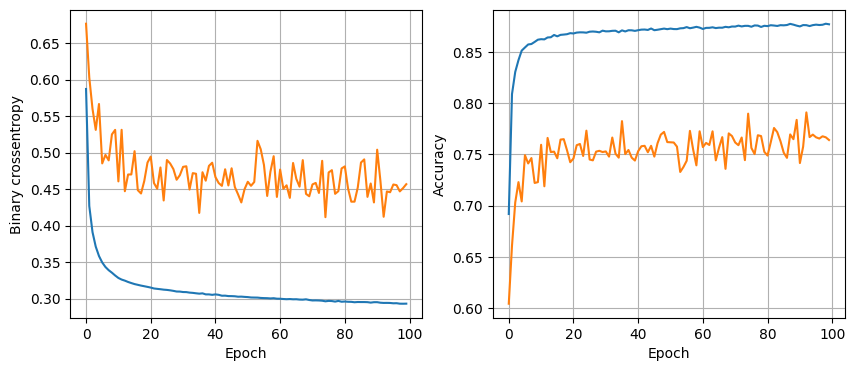

595/595 [==============================] - 1s 1ms/step - loss: 0.2880 - accuracy: 0.8796
16 nodes, dropout 0.2, lr 0.01, batch size 32


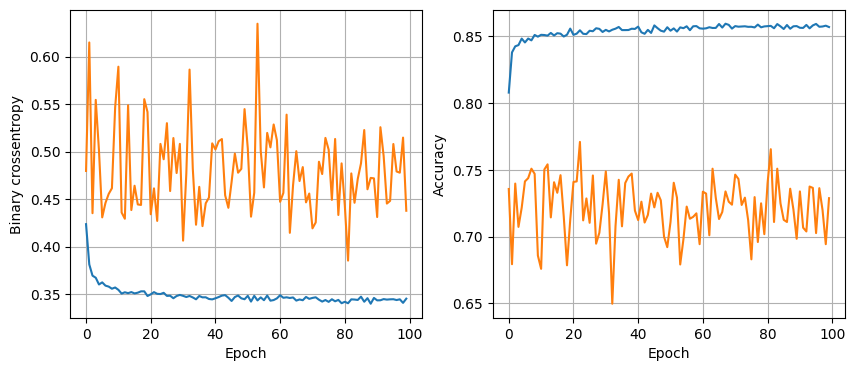

595/595 [==============================] - 1s 1ms/step - loss: 0.3130 - accuracy: 0.8729
16 nodes, dropout 0.2, lr 0.01, batch size 64


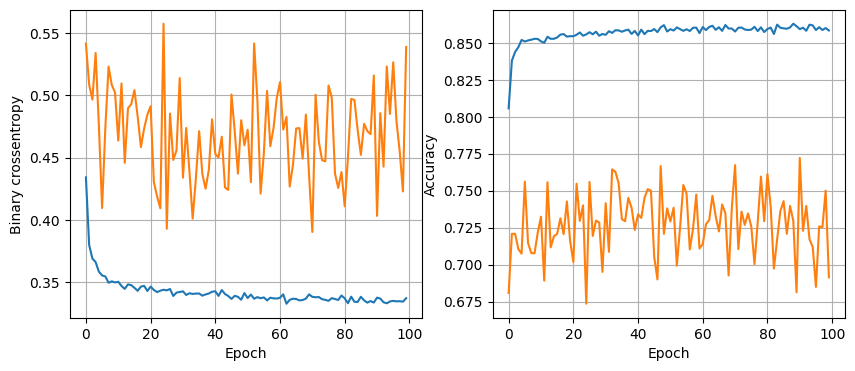

595/595 [==============================] - 1s 1ms/step - loss: 0.2998 - accuracy: 0.8731
16 nodes, dropout 0.2, lr 0.01, batch size 128


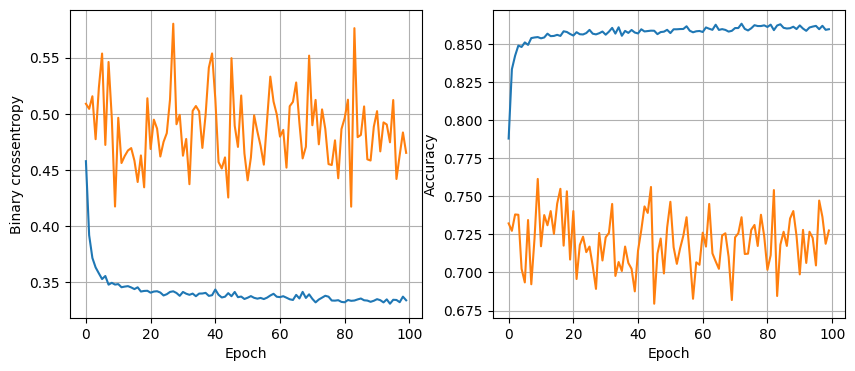

595/595 [==============================] - 1s 1ms/step - loss: 0.3016 - accuracy: 0.8762
16 nodes, dropout 0.2, lr 0.005, batch size 32


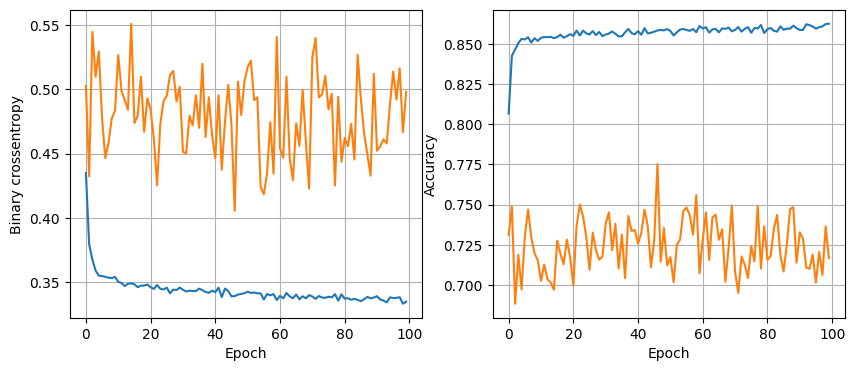

595/595 [==============================] - 1s 1ms/step - loss: 0.3042 - accuracy: 0.8747
16 nodes, dropout 0.2, lr 0.005, batch size 64


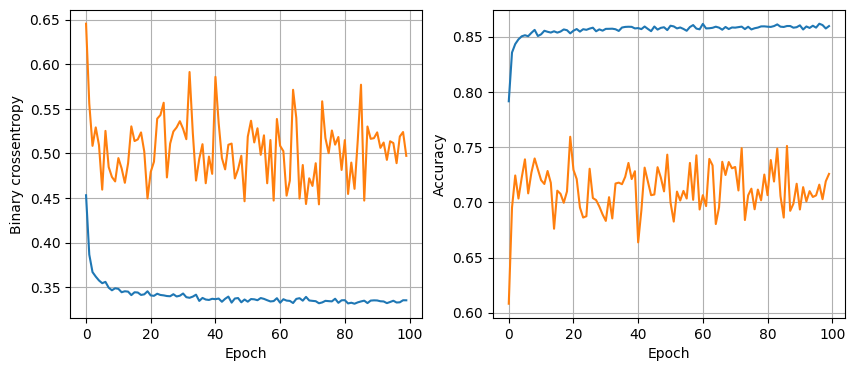

595/595 [==============================] - 1s 1ms/step - loss: 0.3017 - accuracy: 0.8740
16 nodes, dropout 0.2, lr 0.005, batch size 128


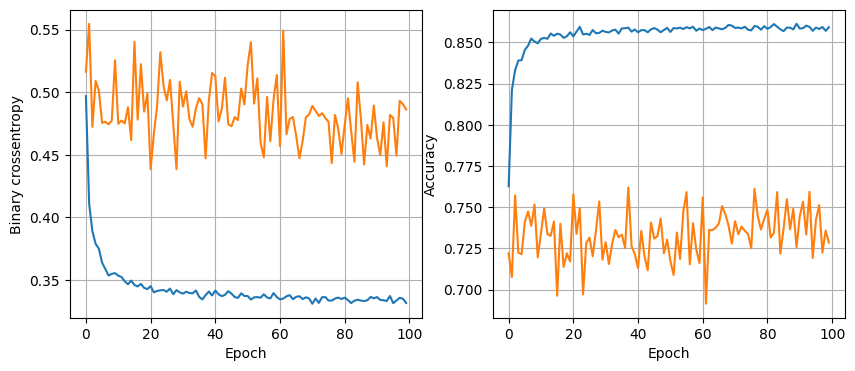

595/595 [==============================] - 1s 1ms/step - loss: 0.3026 - accuracy: 0.8742
16 nodes, dropout 0.2, lr 0.001, batch size 32


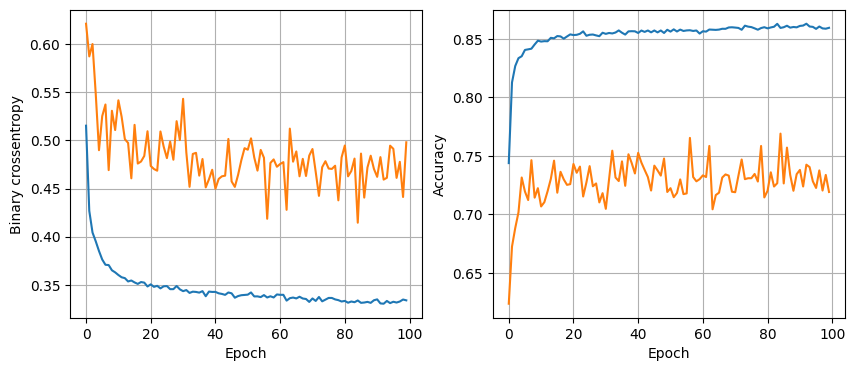

595/595 [==============================] - 1s 1ms/step - loss: 0.3023 - accuracy: 0.8747
16 nodes, dropout 0.2, lr 0.001, batch size 64


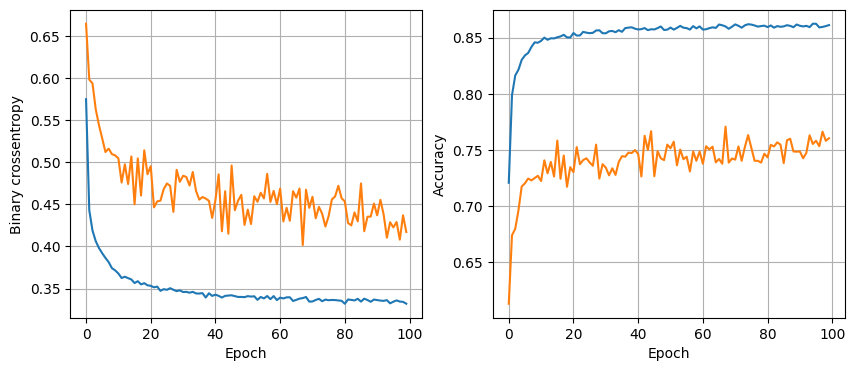

595/595 [==============================] - 1s 1ms/step - loss: 0.3095 - accuracy: 0.8754
16 nodes, dropout 0.2, lr 0.001, batch size 128


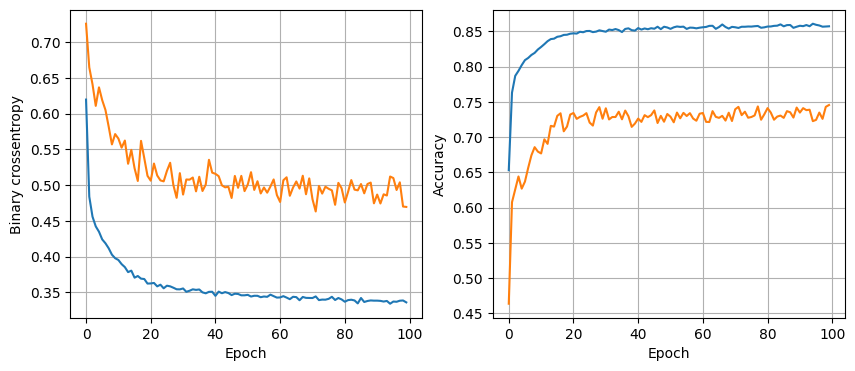

595/595 [==============================] - 1s 1ms/step - loss: 0.3041 - accuracy: 0.8740
32 nodes, dropout 0, lr 0.01, batch size 32


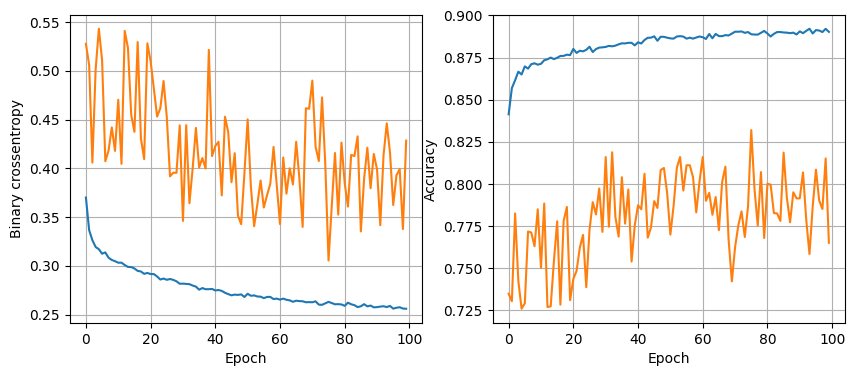

595/595 [==============================] - 1s 1ms/step - loss: 0.2455 - accuracy: 0.8942
32 nodes, dropout 0, lr 0.01, batch size 64


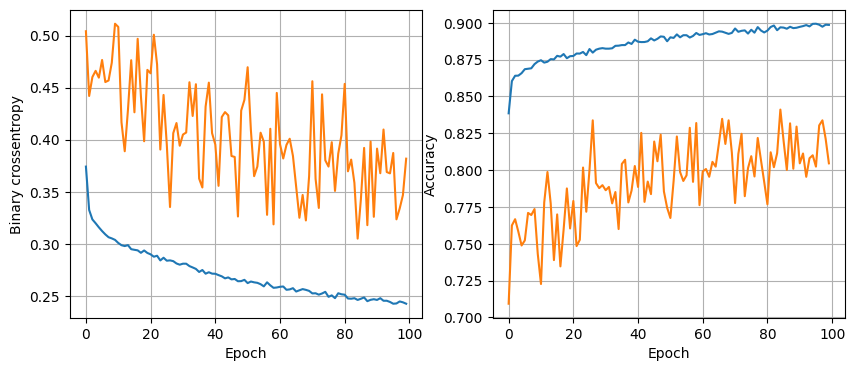

595/595 [==============================] - 1s 1ms/step - loss: 0.2354 - accuracy: 0.9048
32 nodes, dropout 0, lr 0.01, batch size 128


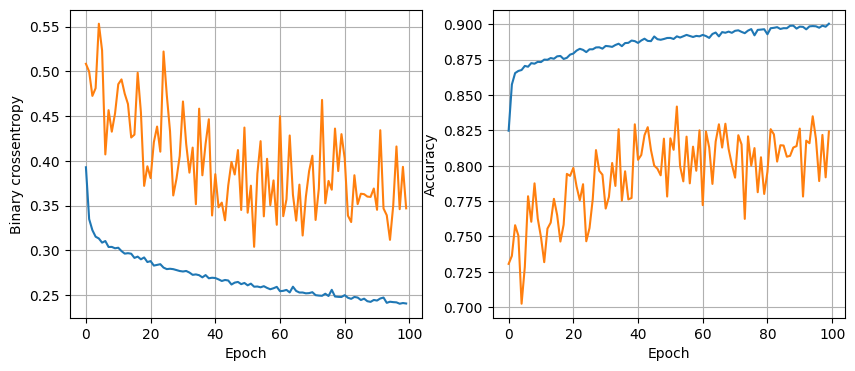

595/595 [==============================] - 1s 1ms/step - loss: 0.2303 - accuracy: 0.9021
32 nodes, dropout 0, lr 0.005, batch size 32


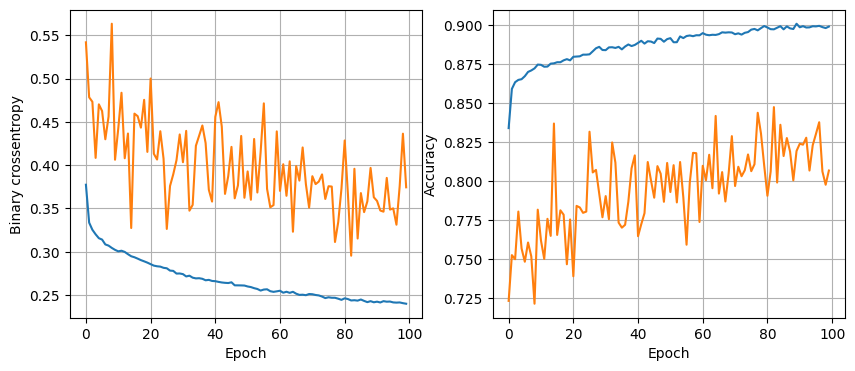

595/595 [==============================] - 1s 2ms/step - loss: 0.2288 - accuracy: 0.9062
32 nodes, dropout 0, lr 0.005, batch size 64


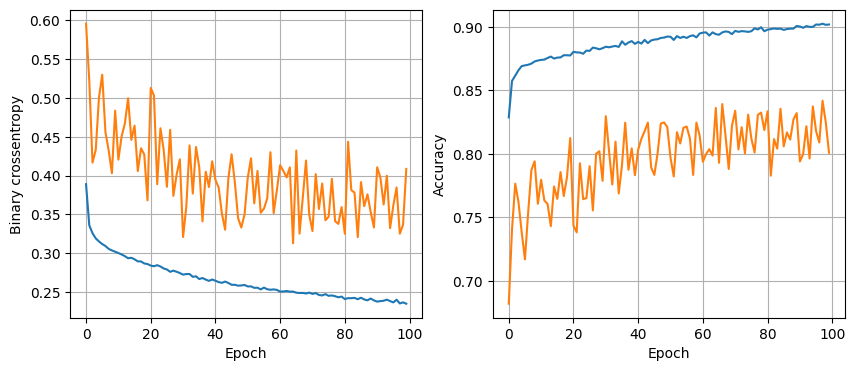

595/595 [==============================] - 1s 1ms/step - loss: 0.2268 - accuracy: 0.9067
32 nodes, dropout 0, lr 0.005, batch size 128


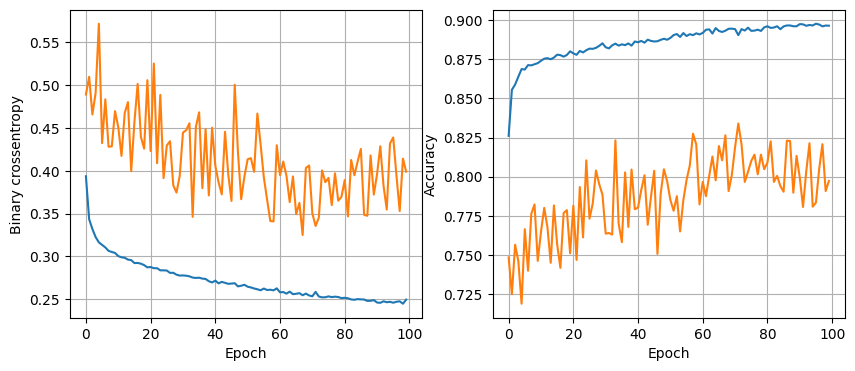

595/595 [==============================] - 1s 1ms/step - loss: 0.2347 - accuracy: 0.9032
32 nodes, dropout 0, lr 0.001, batch size 32


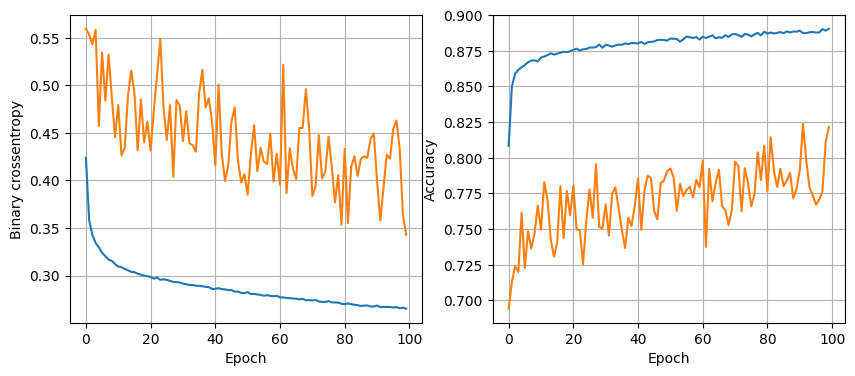

595/595 [==============================] - 1s 1ms/step - loss: 0.2647 - accuracy: 0.8920
32 nodes, dropout 0, lr 0.001, batch size 64


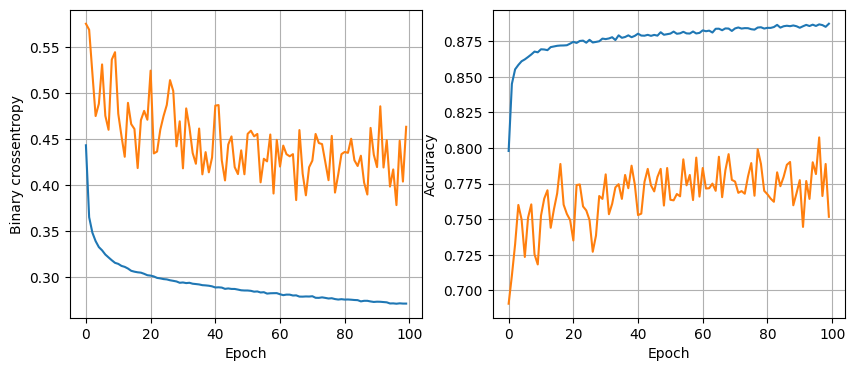

595/595 [==============================] - 1s 1ms/step - loss: 0.2674 - accuracy: 0.8890
32 nodes, dropout 0, lr 0.001, batch size 128


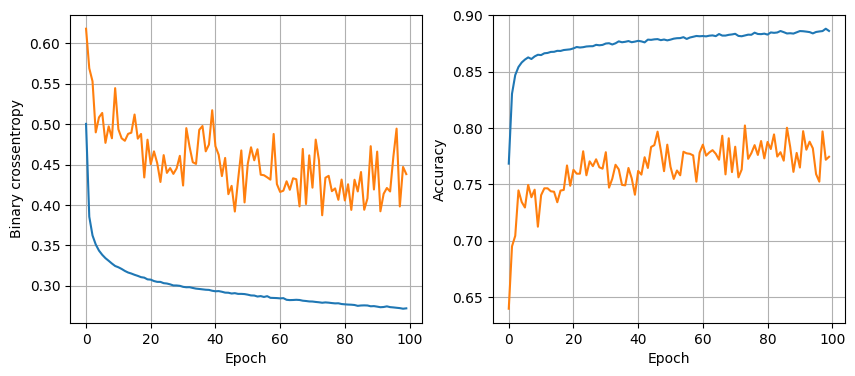

595/595 [==============================] - 1s 2ms/step - loss: 0.2660 - accuracy: 0.8904
32 nodes, dropout 0.2, lr 0.01, batch size 32


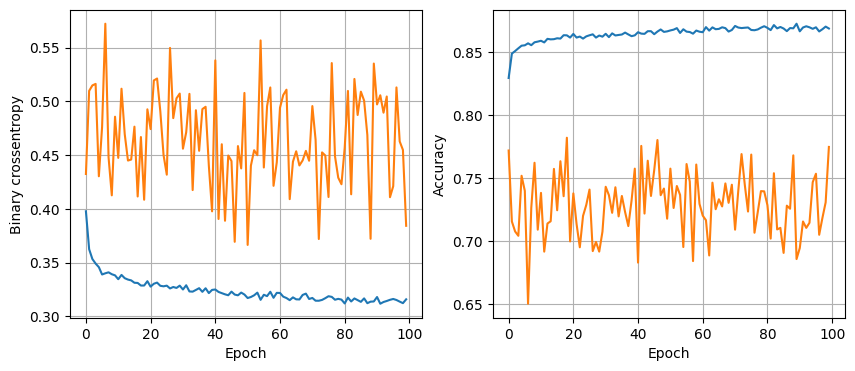

595/595 [==============================] - 1s 1ms/step - loss: 0.2843 - accuracy: 0.8863
32 nodes, dropout 0.2, lr 0.01, batch size 64


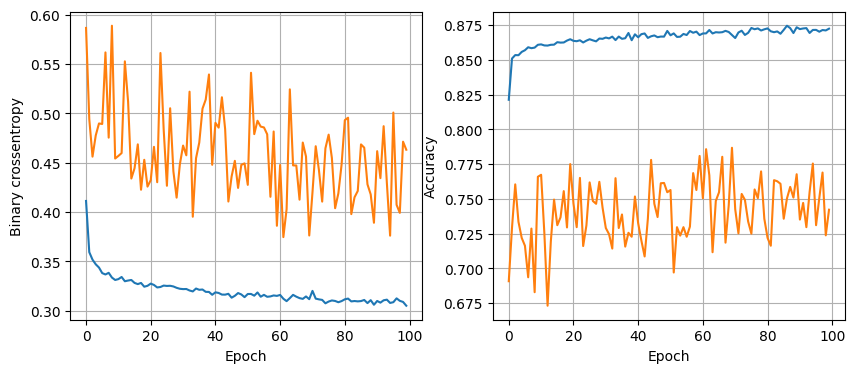

595/595 [==============================] - 1s 2ms/step - loss: 0.2804 - accuracy: 0.8851
32 nodes, dropout 0.2, lr 0.01, batch size 128


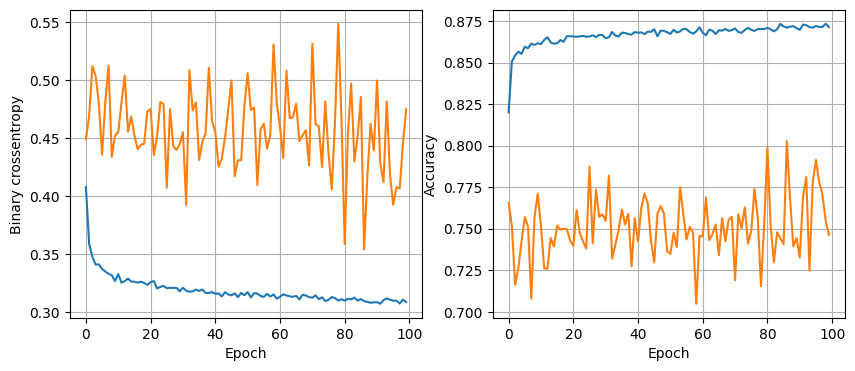

595/595 [==============================] - 1s 2ms/step - loss: 0.2774 - accuracy: 0.8846
32 nodes, dropout 0.2, lr 0.005, batch size 32


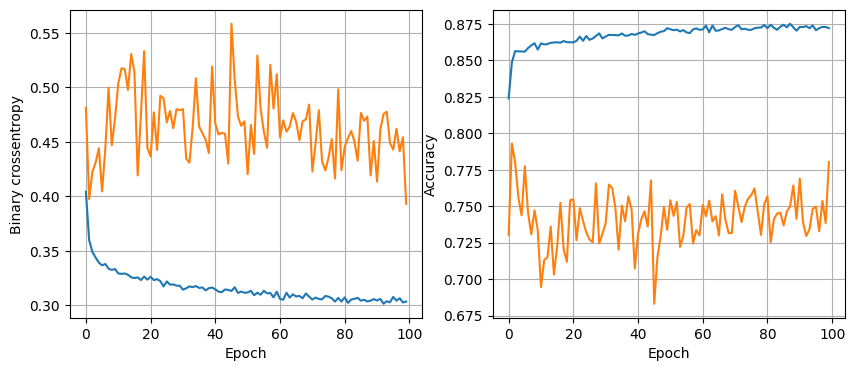

595/595 [==============================] - 1s 2ms/step - loss: 0.2727 - accuracy: 0.8889
32 nodes, dropout 0.2, lr 0.005, batch size 64


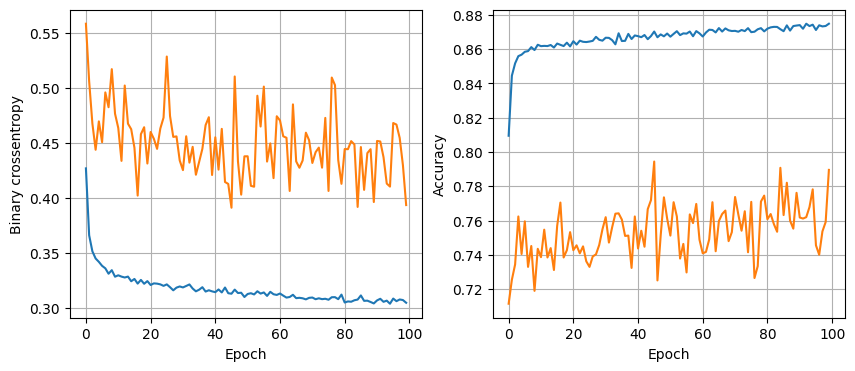

595/595 [==============================] - 1s 2ms/step - loss: 0.2791 - accuracy: 0.8865
32 nodes, dropout 0.2, lr 0.005, batch size 128


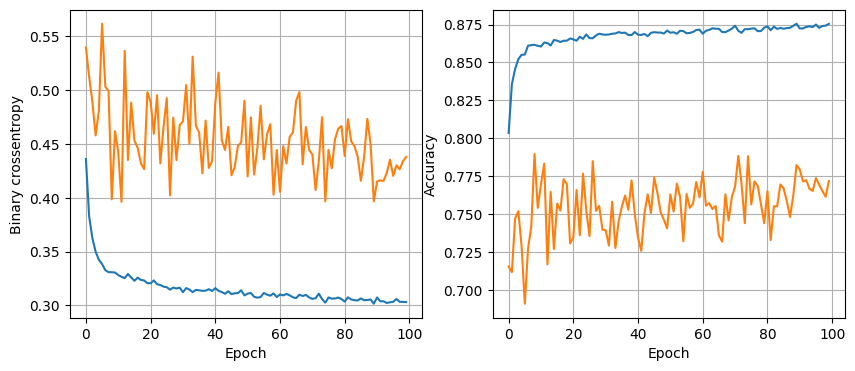

595/595 [==============================] - 1s 2ms/step - loss: 0.2728 - accuracy: 0.8878
32 nodes, dropout 0.2, lr 0.001, batch size 32


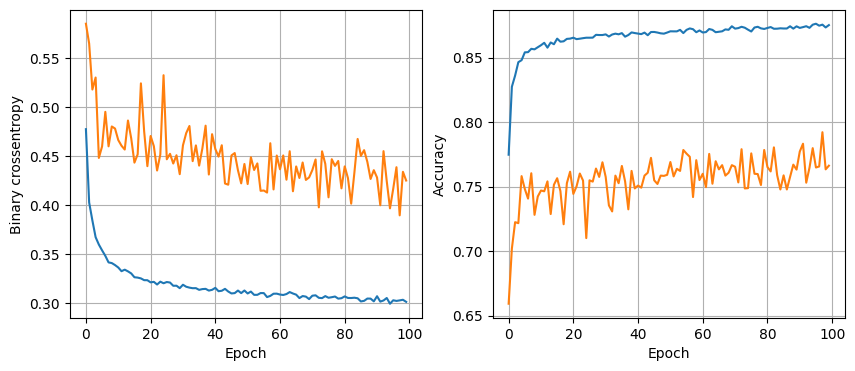

595/595 [==============================] - 1s 2ms/step - loss: 0.2764 - accuracy: 0.8864
32 nodes, dropout 0.2, lr 0.001, batch size 64


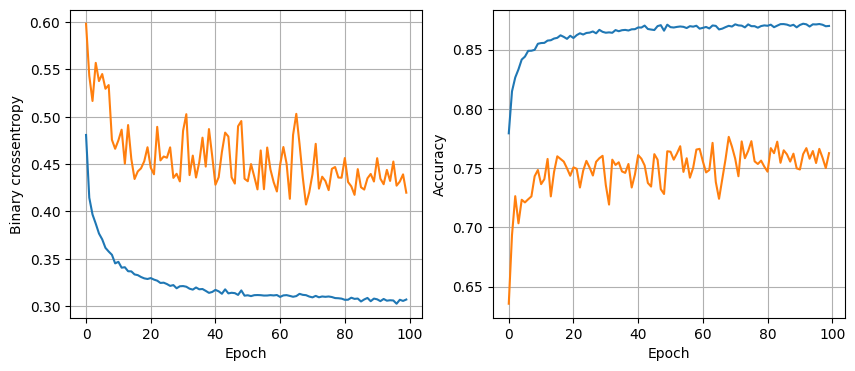

595/595 [==============================] - 1s 2ms/step - loss: 0.2818 - accuracy: 0.8822
32 nodes, dropout 0.2, lr 0.001, batch size 128


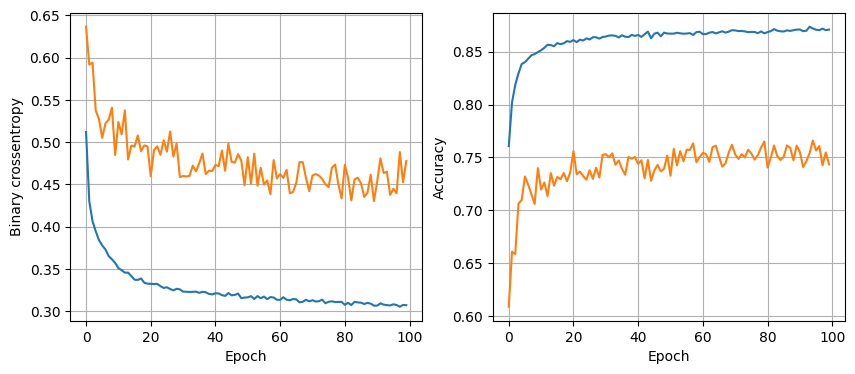

595/595 [==============================] - 1s 2ms/step - loss: 0.2812 - accuracy: 0.8837
64 nodes, dropout 0, lr 0.01, batch size 32


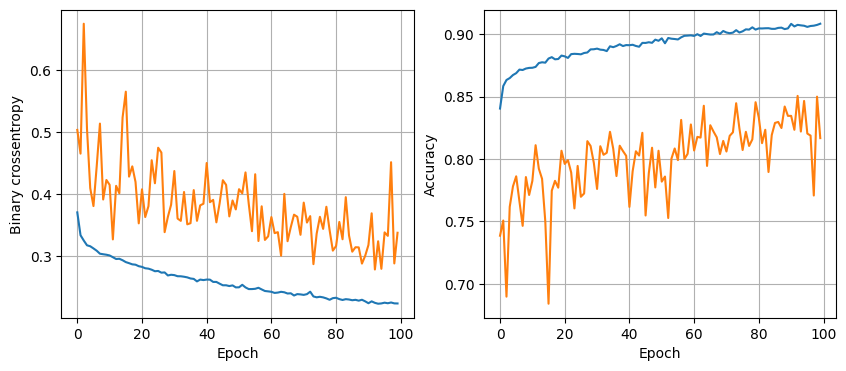

595/595 [==============================] - 1s 2ms/step - loss: 0.2079 - accuracy: 0.9134
64 nodes, dropout 0, lr 0.01, batch size 64


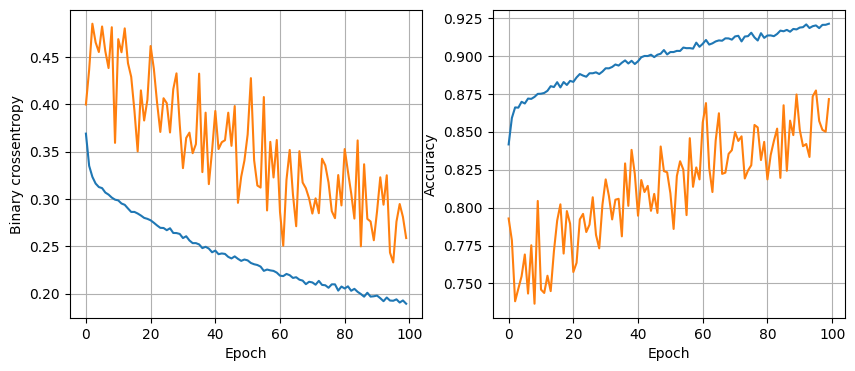

595/595 [==============================] - 1s 2ms/step - loss: 0.1730 - accuracy: 0.9305
64 nodes, dropout 0, lr 0.01, batch size 128


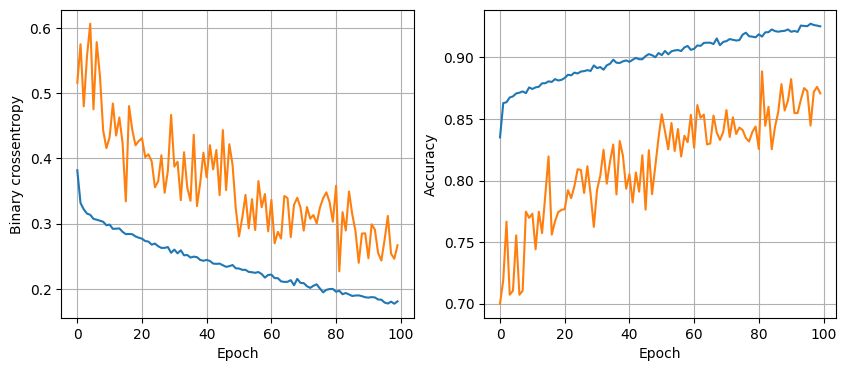

595/595 [==============================] - 1s 2ms/step - loss: 0.1638 - accuracy: 0.9339
64 nodes, dropout 0, lr 0.005, batch size 32


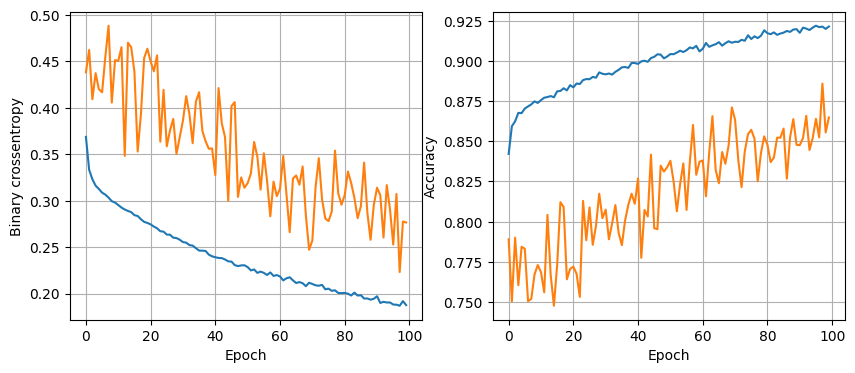

595/595 [==============================] - 1s 2ms/step - loss: 0.1815 - accuracy: 0.9252
64 nodes, dropout 0, lr 0.005, batch size 64


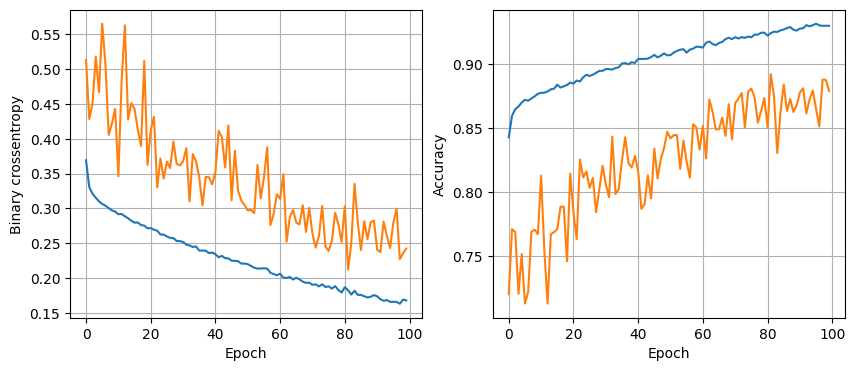

595/595 [==============================] - 1s 2ms/step - loss: 0.1531 - accuracy: 0.9383
64 nodes, dropout 0, lr 0.005, batch size 128


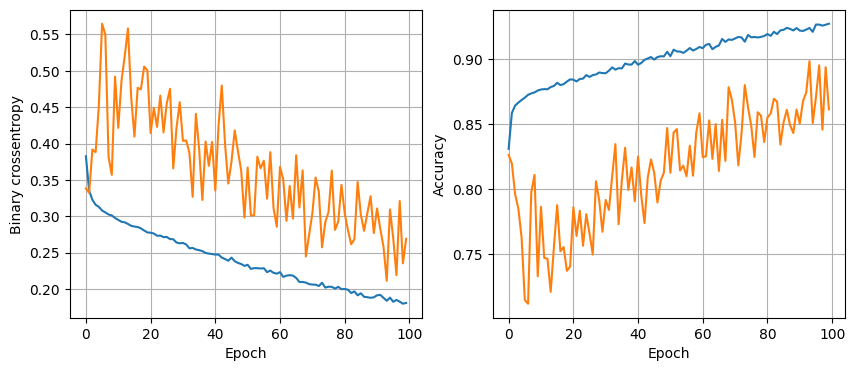

595/595 [==============================] - 1s 2ms/step - loss: 0.1652 - accuracy: 0.9361
64 nodes, dropout 0, lr 0.001, batch size 32


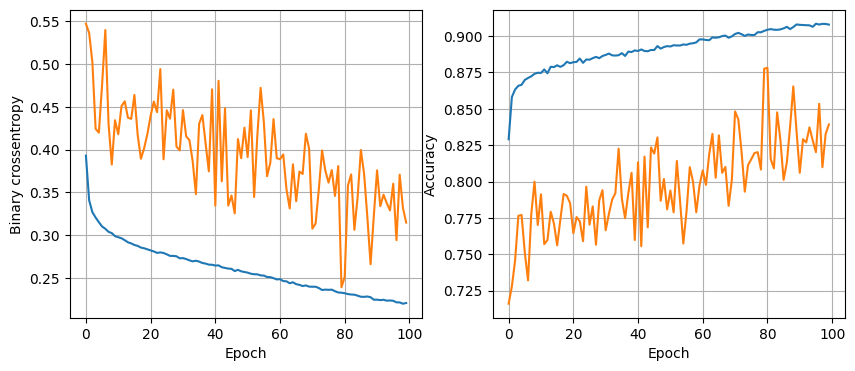

595/595 [==============================] - 1s 1ms/step - loss: 0.2110 - accuracy: 0.9147
64 nodes, dropout 0, lr 0.001, batch size 64


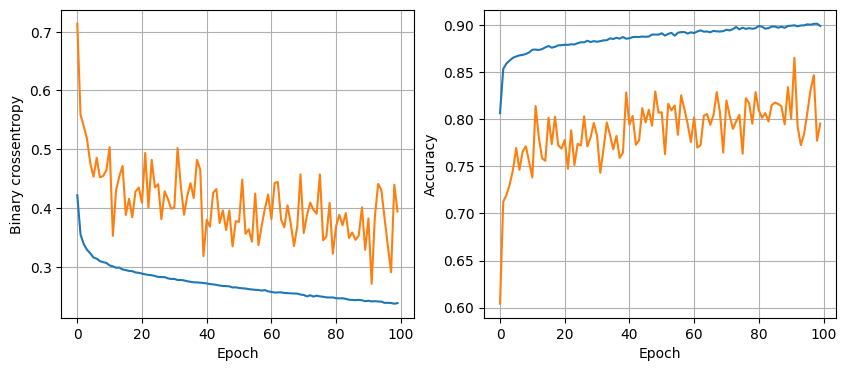

595/595 [==============================] - 1s 2ms/step - loss: 0.2312 - accuracy: 0.9053
64 nodes, dropout 0, lr 0.001, batch size 128


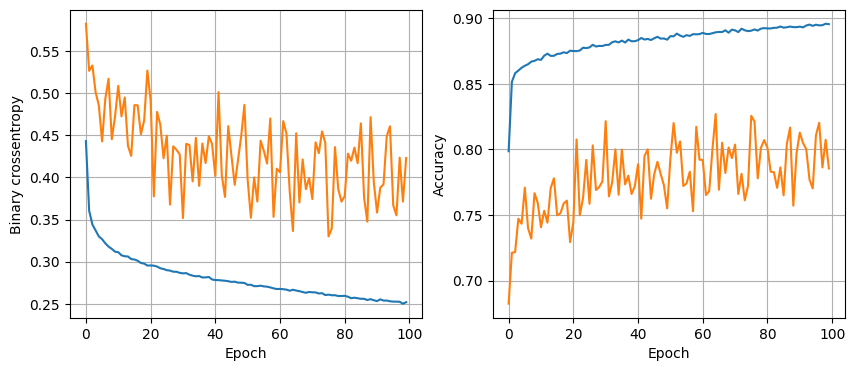

595/595 [==============================] - 1s 2ms/step - loss: 0.2443 - accuracy: 0.8995
64 nodes, dropout 0.2, lr 0.01, batch size 32


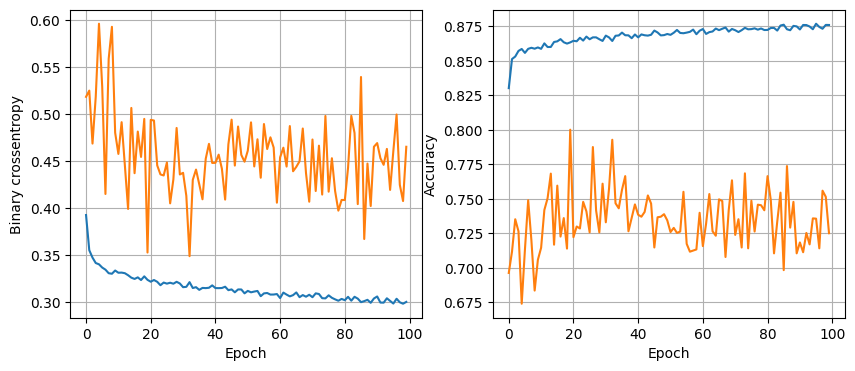

595/595 [==============================] - 1s 1ms/step - loss: 0.2703 - accuracy: 0.8861
64 nodes, dropout 0.2, lr 0.01, batch size 64


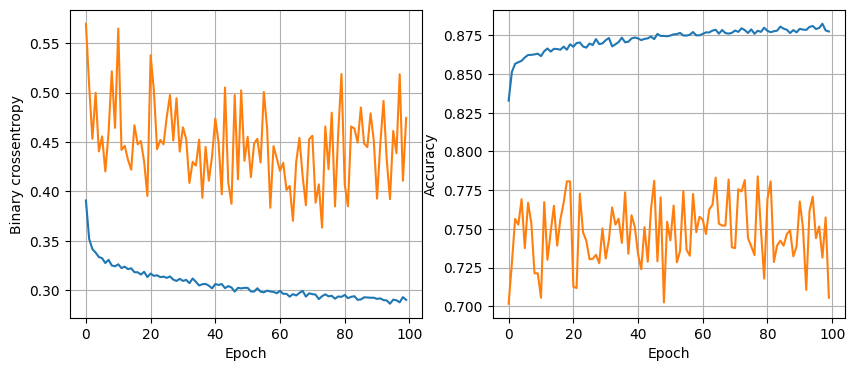

595/595 [==============================] - 1s 1ms/step - loss: 0.2782 - accuracy: 0.8823
64 nodes, dropout 0.2, lr 0.01, batch size 128


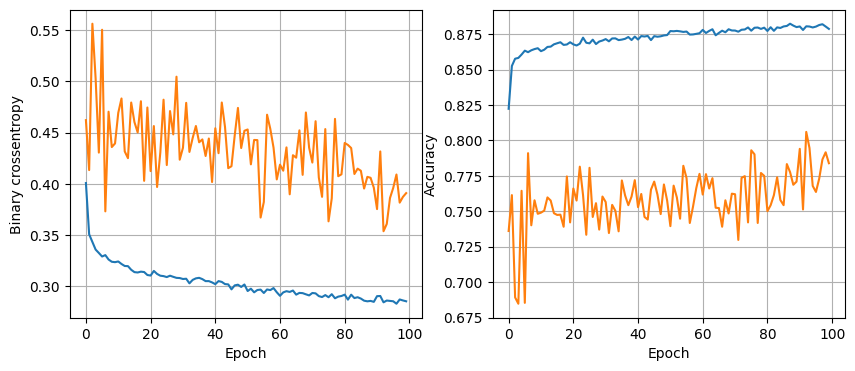

595/595 [==============================] - 1s 1ms/step - loss: 0.2575 - accuracy: 0.8942
64 nodes, dropout 0.2, lr 0.005, batch size 32


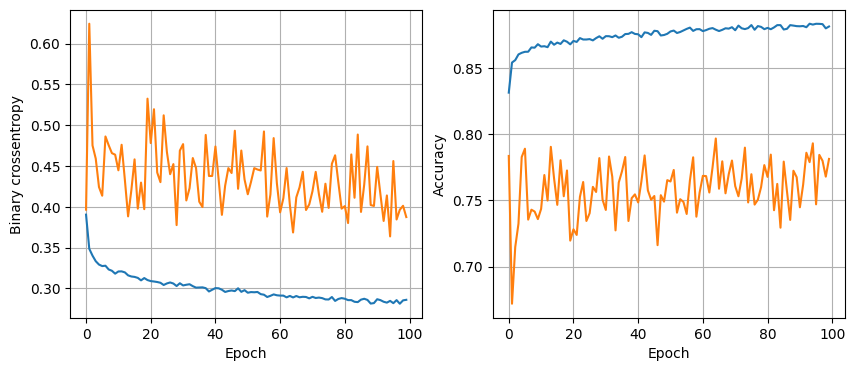

595/595 [==============================] - 1s 1ms/step - loss: 0.2493 - accuracy: 0.8971
64 nodes, dropout 0.2, lr 0.005, batch size 64


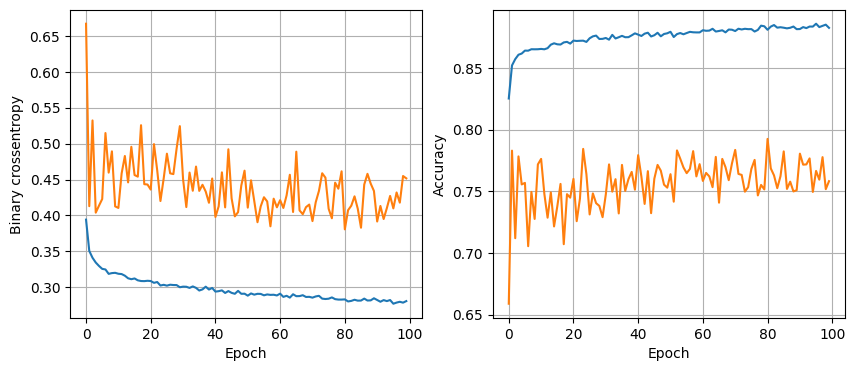

595/595 [==============================] - 1s 2ms/step - loss: 0.2516 - accuracy: 0.8964
64 nodes, dropout 0.2, lr 0.005, batch size 128


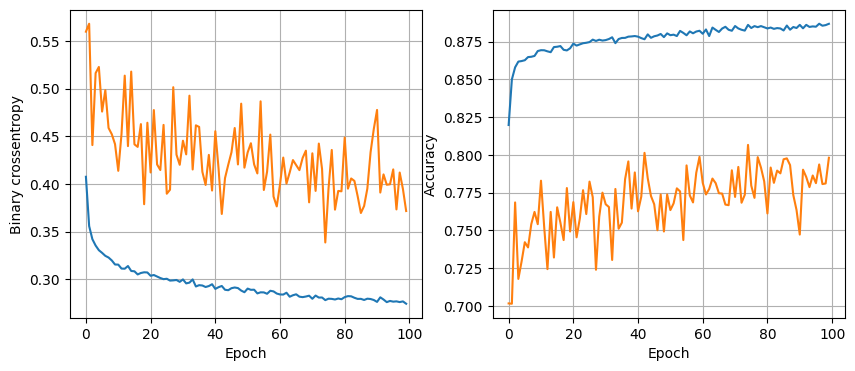

595/595 [==============================] - 1s 2ms/step - loss: 0.2460 - accuracy: 0.8999
64 nodes, dropout 0.2, lr 0.001, batch size 32


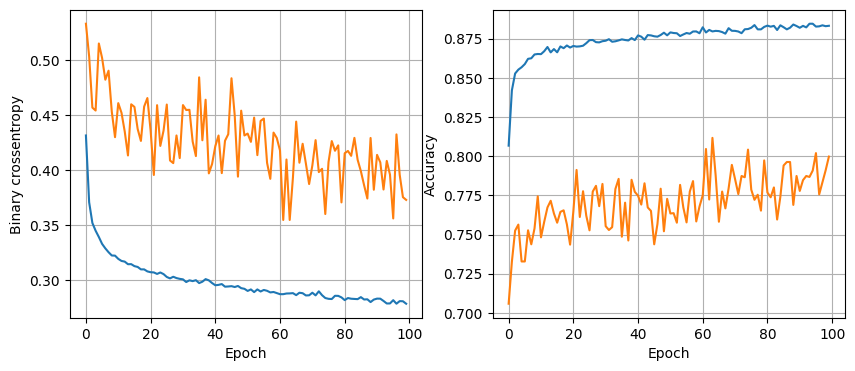

595/595 [==============================] - 1s 2ms/step - loss: 0.2539 - accuracy: 0.8968
64 nodes, dropout 0.2, lr 0.001, batch size 64


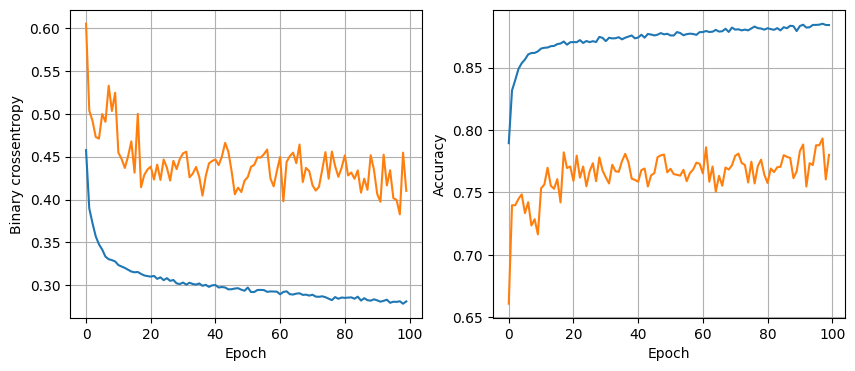

595/595 [==============================] - 1s 1ms/step - loss: 0.2538 - accuracy: 0.8954
64 nodes, dropout 0.2, lr 0.001, batch size 128


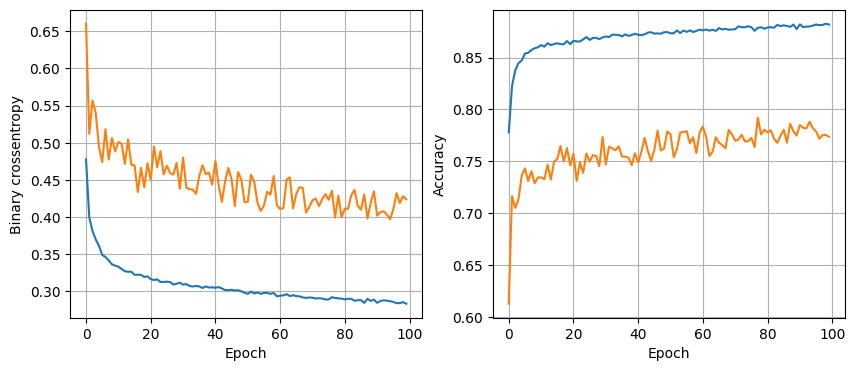

595/595 [==============================] - 1s 2ms/step - loss: 0.2611 - accuracy: 0.8947


In [56]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid, y_valid)[0]
        if val_loss < least_val_loss:   
          least_val_loss = val_loss
          least_loss_model = model

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      6688
           1       0.89      0.91      0.90     12332

    accuracy                           0.87     19020
   macro avg       0.86      0.85      0.86     19020
weighted avg       0.87      0.87      0.87     19020



Thanks for reading through and seeing my work I hope you appreciate and leave some suggestions for me 